## Dataset

 1) Elon Musk tweets from Year 2013 - Year 2017
 2) Stock Prices of Tesla from Year 2012 - Year 2017

## Data Analysis Goals

1) Tweeting trends yearly over a period of 5 years 
2) Tweeting habits of Elon musk by month
3) Sentiment Analysis of tweets
  a) Most common words in entire dataset using wordcloud
  b) Checking for polarity and subjectivity of corpus
4) Stock price trend of TSLA stock over 5 years
5) Price change of TSLA stock due to tweets from Elon Musk over the period covered 

## Importing Libraries and Exploring Data

In [387]:
#Basic libraries
import pandas as pd
from datetime import datetime 
from dateutil import parser
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Libraries for NLP
import re 
import nltk
nltk.download('punkt')
nltk.download('stopwords') # contains list of words which are irrelevant for sentiment analysis. This step we download the words
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer # library to get rid of tenses of the words
from nltk.tokenize import word_tokenize
from string import punctuation 
from textblob import TextBlob

#Libraries for visualisation
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayank.chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayank.chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [388]:
# Importing First Dataset
# Specifying encoder as data downloaded is not UTF-8 encoded
tweets = pd.read_csv('data_elonmusk.csv', encoding = 'unicode_escape')

In [389]:
#Importing second dataset
# Specifying encoder as data downloaded is not UTF-8 encoded
tsla = pd.read_csv('TSLA.csv', encoding = 'unicode_escape')

In [390]:
#Exploring data
tweets.columns
#Relevant columns: Tweet and Time

Index(['row ID', 'Tweet', 'Time', 'Retweet from', 'User'], dtype='object')

In [391]:
# Checking if relevant columns have any null values
tweets.isnull().sum()
# 'Retweet from' column is not important

row ID          0   
Tweet           0   
Time            0   
Retweet from    2693
User            0   
dtype: int64

## Tweeting trends over a period of 5 years

As time column is a string of date and time, it needs to be parsed to recognize date and time. 

Text(0, 0.5, 'Number of Tweets')

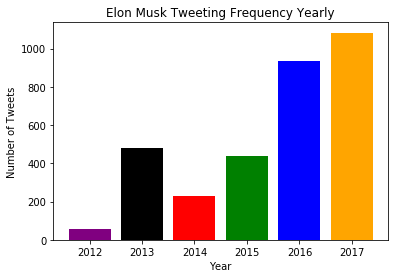

In [392]:
# Modifying Time column to parse date and time and saving it a new column 'New_Date'
new_date = []
for date in tweets['Time']:
    new_date.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S'))
    
# Adding list as part of the dataset
tweets['New_Date'] = new_date

#Calculating the number of tweets in every year
year_list = []
for date in tweets['New_Date']:
    year_list.append(date.year)
    
# Saving tweeting frequency in a dictionary and using a counter method
yearly_frequency = dict(Counter(year_list))

#Plotting bargraph of frequency
plt.bar(yearly_frequency.keys(), yearly_frequency.values(), color=['orange', 'blue', 'green', 'red', 'black', 'purple'])
plt.title('Elon Musk Tweeting Frequency Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

## Tweeting frequency by month


Enter Year for monthly Frequency Check (Choose from 2014, 2015, 2016 and 2017)2016
{12: 50, 11: 82, 10: 102, 9: 87, 8: 38, 7: 143, 6: 72, 5: 84, 4: 156, 3: 40, 2: 48, 1: 32}


Text(0, 0.5, 'Number of Tweets')

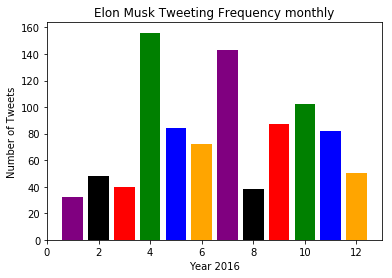

In [394]:
#Calculating the number of tweets in every month based on input year
def tweets_month(year):
    month_list = []
    for date in tweets['New_Date']:
        if date.year == year:
            month_list.append(date.month)
    return dict(Counter(month_list))
year = int(input('Enter Year for monthly Frequency Check (Choose from 2014, 2015, 2016 and 2017)'))
monthly_frequency = tweets_month(year)
print(monthly_frequency)
plt.bar(monthly_frequency.keys(), monthly_frequency.values(), color=['orange', 'blue', 'green', 'red', 'black', 'purple'])
plt.title('Elon Musk Tweeting Frequency monthly' )
plt.xlabel(f'Year'+ ' ' + str(year))
plt.ylabel('Number of Tweets')

## Sentiment Analysis using NLP

In [395]:
# Cleaning the data
corpus = [] 
for tweet in tweets['Tweet']:
#     tweet = re.sub('[^a-zA-Z]', ' ', tweets['Tweet']) #remove all punctuations and signs
    tweet = re.sub('[^a-zA-Z]', ' ', tweet) #remove all punctuations and signs
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = tweet.lower() 
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello). Output is a list
#     tweet = tweet.split() # Split the review into a list of its words
    ps = PorterStemmer() # to keep only the roots of the words. No tenses of the words are kept
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))] #to keep the word which is not in the
    #the stop words list
    tweet = ' '.join(tweet) # Making review back into a string from a list separated by a space.
    corpus.append(tweet)



## WordCloud

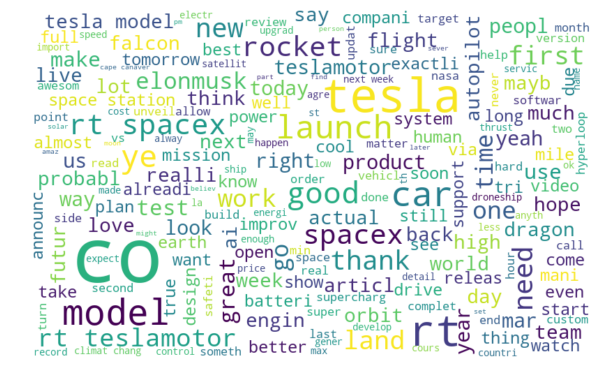

In [396]:
# Generating WordCloud to see most occuring words
all_words = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words seem to be either positive or neutral like 'next', 'hope', 'new', 'first', 'thank'. Brand words like 'Tesla' and 'SpaceX' seem to appear a lot.

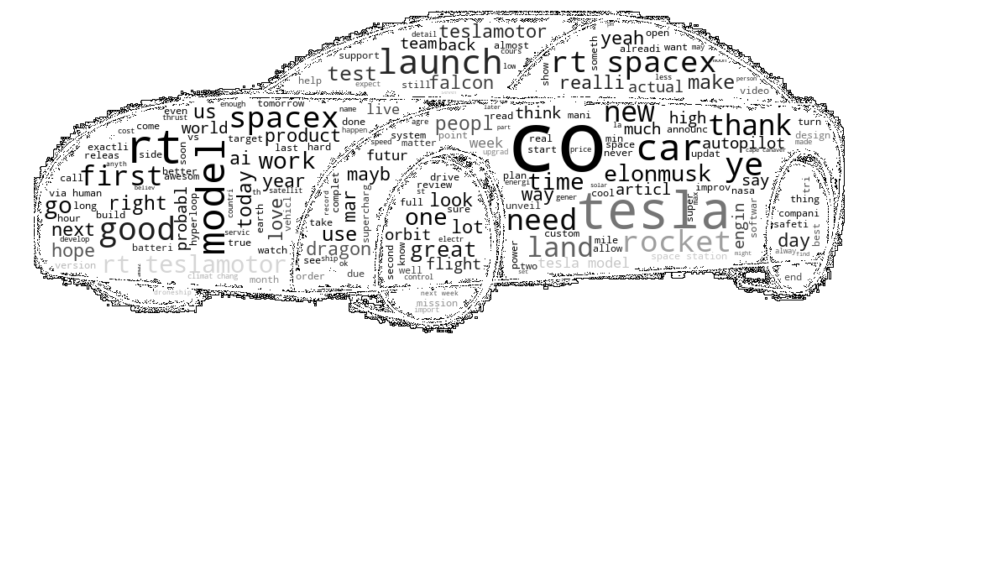

In [397]:
tesla_mask = np.array(Image.open("Tesla1.png"))
all_words = ' '.join(corpus)
wordcloud = WordCloud(background_color = "white", random_state=101, mask = tesla_mask, max_font_size=100, contour_width = 0.01, contour_color = 'black')
wordcloud.generate(all_words)
image_colors = ImageColorGenerator(tesla_mask)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

Checking for positive or negative sentiment of tweets
The sentiment function of textblob returns two properties, polarity, and subjectivity.
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means 
a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment
whereas objective refers to factual information. Subjectivity is also a float which lies in 
the range of [0,1].

## Polarity of tweets

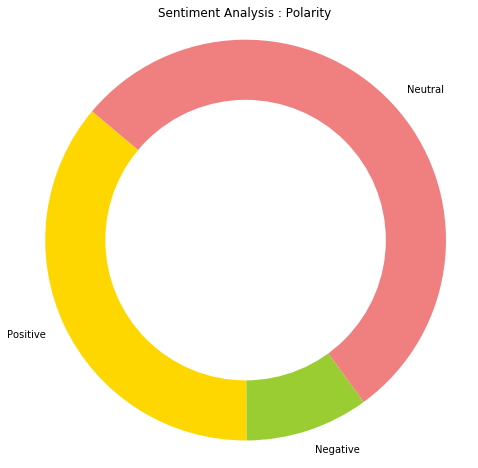

In [398]:
p = 0 # Counter for positive sentiment
n = 0 # Counter for negative sentiment
u = 0 # Counter for neutral sentiment
for tweet in corpus:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        p = p + 1            
    elif analysis.sentiment[0]<0:
        n += 1
    else:
        u += 1
result = {'Positive': p, 'Negative': n, 'Neutral': u}    
#print(result)
#Visualising sentiment analysis
sizes = result.values()
labels = result.keys()
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels = labels, shadow=False, colors = colors, startangle=140)
plt.title('Sentiment Analysis : Polarity' )
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,8)


## Subjectivity of tweets

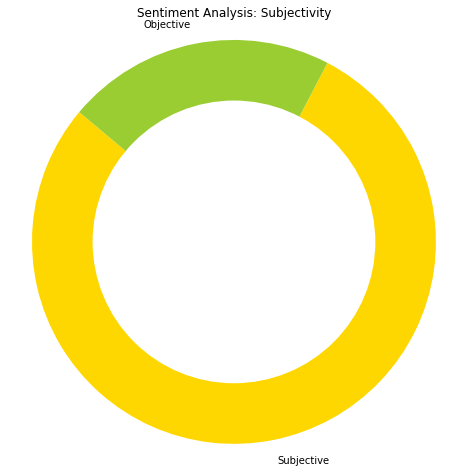

In [399]:
s = 0 # Counter for subjective sentiment
o = 0 # Counter for objective sentiment
for tweet in corpus:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        s = s + 1            
    elif analysis.sentiment[0]<0:
        o += 1
result = {'Subjective': s, 'Objective': o}    
#print(result)
#Visualising sentiment analysis
sizes = result.values()
labels = result.keys()
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels = labels, shadow=False, colors = colors, startangle=140)
plt.title('Sentiment Analysis: Subjectivity' )
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,8)

## Exploring Stock Data set and cleaning data

In [257]:
tsla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

As time column is a string of date and time, it needs to be parsed to recognize date and time.

In [258]:
new_date = []
for date in tsla['Date']:
    new_date.append(datetime.strptime(date, '%Y-%m-%d'))
    
# Adding list as part of the dataset
tsla['New_Date'] = new_date

In [259]:
tsla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'New_Date'],
      dtype='object')

Calculating relative change in stock prices 

In [260]:
relative_change = [0]
def percentage(x):
    for i in range(1, len(tsla[x])):
        change = 0
        change = (np.absolute(tsla[x][i] - tsla[x][i-1])/tsla[x][i-1])*100
        relative_change.append(change)
    return(relative_change)
percentage('Close')        
tsla['Relative_Change'] = relative_change    


Based on 10% change in closing stock price change, creating a dataframe with stock price, change percentage and 
respective date of stock price change

In [372]:
change_date = []
change_percentage = []
change_price = []
for i in range(0, len(tsla['Relative_Change'])):
    if tsla['Relative_Change'][i] > 10:
        change_date.append(tsla['New_Date'][i].date())
        change_percentage.append(tsla['Relative_Change'][i])
        change_price.append(tsla['Close'][i])
data_frame = pd.DataFrame()
data_frame['change_date'] = change_date
data_frame['change_percentage'] = change_percentage
data_frame['change_price'] = change_price
data_frame

,change_date,change_percentage,change_price
0,2012-01-13,19.327430,22.790001
1,2012-01-17,16.717854,26.600000
2,2013-04-01,15.940885,43.930000
3,2013-05-09,24.395054,69.400002
4,2013-05-10,10.605187,76.760002
5,2013-05-13,14.382492,87.800003
6,2013-05-28,13.648537,110.330002
7,2013-07-16,14.309287,109.050003
8,2013-07-17,10.270515,120.250000
9,2013-08-08,14.341057,153.479996


## Stock Price trend and percentage on single plot

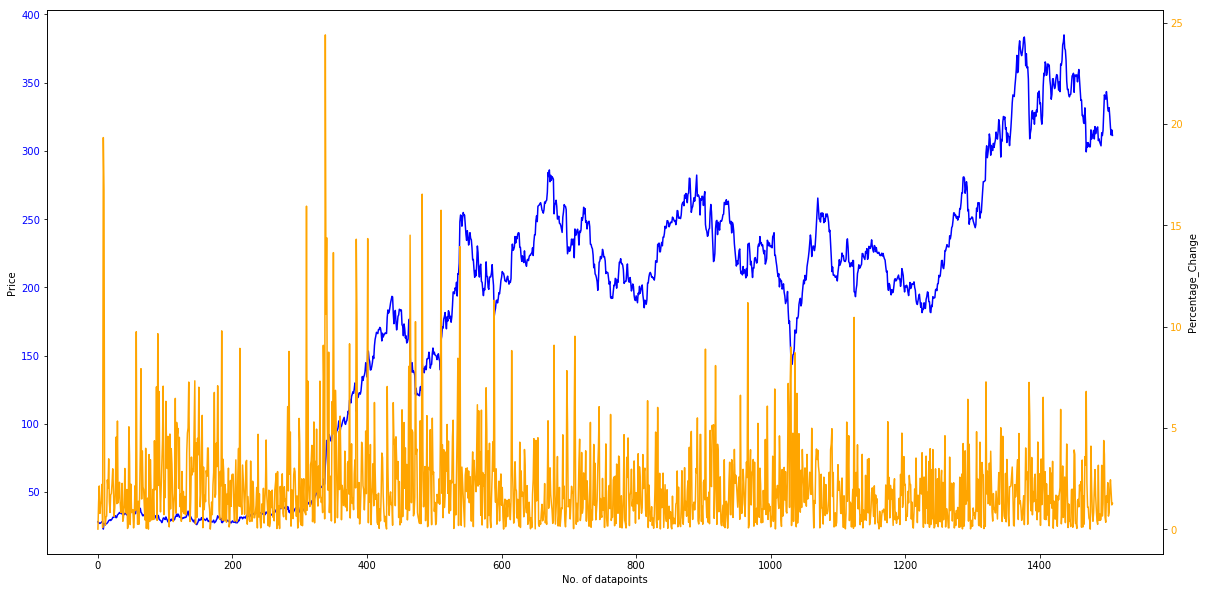

In [386]:
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel('No. of datapoints')
ax1.set_ylabel('Price' )
ax1.plot(tsla['Close'], color = 'blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Percentage_Change')  # we already handled the x-label with ax1
ax2.plot(tsla['Relative_Change'], color = 'orange')
ax2.tick_params(axis='y', labelcolor='orange')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Tweet and Change Percentage

Based on dates where price change was greater than 10%, I find the same date tweets in tweets dataset to filter out the first tweet of that day.
Creating a new dataset with tweet and corresponding change percentage

In [385]:
pd.set_option('display.max_colwidth', -1) ## To display un-truncated dataset.
tweet_list = {}
for i in range(0, len(tweets['New_Date'])):
    for j in range(0, len(data_frame['change_date'])):
        if data_frame['change_date'][j] == tweets['New_Date'][i].date():
            tweet_list[data_frame['change_percentage'][j]] = tweets['Tweet'][i]
tweet_data_frame = pd.DataFrame()
tweet_data_frame['Tweet'] = tweet_list.values()
tweet_data_frame['Change_Percentage'] = tweet_list.keys()
tweet_data_frame


,Tweet,Change_Percentage
0,"@Recode Article is misleading to readers. No one is taking home anything. In a stock for stock transaction, nothing comes off the table.",10.450342
1,All four landing legs now mounted on Falcon 9 http://t.co/5ZNG1NflsG,13.944409
2,"RT @TheOnion: A combination of hubris, treachery, and low prices will mark the end of your reign as Mattress King | Horoscopes: http://t.co?",15.738488
3,"German govt reviews Tesla Model S fires. All due to high speed impacts, no injuries. Concludes: no defects, no recall http://t.co/24iZzOSL3B",16.533784
4,"Btw, vast majority of credit for SolarCity should go to Lyndon & Peter Rive & their awesome team. I'm just a small part.",14.382492
5,@westcoastbill Thanks Bill!,24.395054
6,First profitable Q for Tesla thanks to awesome customers & hard work by a super dedicated team http://t.co/njumz2SDmx,15.940885
